# Phase-3

# SQL- Operations

**Note: Create a separate table for each file and give a meaningful name.**

**When you are inserting make sure you are NOT inserting the column name in the table, else you don’t get a result.**

**3.1 Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table**

**3.2 Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year**

**3.3 Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year**

**3.4 Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table**

**3.5 Write SQL query to find the highest number of dacoity/robbery in which district.**

**3.6 Write SQL query to find in which districts(All) the lowest number of murders happened.**

**3.7 Write SQL query to find the number of murders in ascending order in district and yearwise.**

**3.8.1 Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table**

**3.8.2 Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.**

**3.8.3 Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.**

**3.8.4 Use appropriate graphs to show your data (the result of 3.8.3)**

# 3.1 Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table

In [1]:
import sqlite3
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Connect to SQLite database
conn = sqlite3.connect('crime_against_women.db')


In [3]:
# Create a cursor
cursor = conn.cursor()

In [4]:
# Create the table with corrected column names and data types
conn.execute('''
    CREATE TABLE CRIMEWOMEN(
        STATE TEXT,
        DISTRICT TEXT,
        Year INTEGER,
        Rape INTEGER,
        Kidnapping INTEGER,
        Dowry INTEGER,
        Assault INTEGER,
        Insult INTEGER,
        Cruelty INTEGER,
        Importation INTEGER
    )
''')


In [5]:
with open('42_District_wise_crimes_committed_against_women_2001_2012.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # Insert data into the table
        conn.execute("INSERT INTO CRIMEWOMEN(STATE, DISTRICT,Year,Rape,Kidnapping,Dowry,Assault,Insult,Cruelty,Importation) VALUES (?, ?,?,?,?,?,?,?,?,?)",
                     (row['STATE/UT'], row['DISTRICT'],row['Year'],row['Rape'],row['Kidnapping and Abduction'],row['Dowry Deaths'],row['Assault on women with intent to outrage her modesty'],row['Insult to modesty of Women'],row['Cruelty by Husband or his Relatives'],row['Importation of Girls']))

In [6]:
conn.commit

<function Connection.commit>

In [7]:
cursor.execute('SELECT * FROM CRIMEWOMEN')

# Fetch and print the results
for row in cursor.fetchall():
    print(row)

('ANDHRA PRADESH', 'ADILABAD', 2001, 50, 30, 16, 149, 34, 175, 0)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 23, 30, 7, 118, 24, 154, 0)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 27, 34, 14, 112, 83, 186, 0)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 20, 20, 17, 126, 38, 57, 0)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 23, 26, 12, 109, 58, 247, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0, 0, 1, 0, 0, 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 54, 51, 7, 139, 129, 378, 0)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 37, 39, 24, 118, 27, 746, 0)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 56, 49, 62, 414, 81, 224, 0)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 47, 30, 17, 180, 336, 172, 0)
('ANDHRA PRADESH', 'KRISHNA', 2001, 37, 21, 10, 208, 72, 265, 0)
('ANDHRA PRADESH', 'KURNOOL', 2001, 29, 47, 13, 141, 107, 92, 0)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 59, 27, 14, 176, 41, 69, 0)
('ANDHRA PRADESH', 'MEDAK', 2001, 35, 20, 26, 100, 25, 192, 0)
('ANDHRA PRADESH', 'NALGONDA', 2001, 35, 19, 31, 188, 59, 214, 0)
('AN

# 3.2 Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

In [8]:
cursor.execute('''SELECT STATE, DISTRICT, Year, MAX(Rape) as MaxRape, MAX([Kidnapping]) as MaxKidnapping
FROM CRIMEWOMEN
WHERE DISTRICT NOT IN ('TOTAL', 'DELHI UT TOTAL')
GROUP BY STATE, DISTRICT, Year
ORDER BY MaxRape DESC, MaxKidnapping DESC
LIMIT 1;''')

# Fetch the result
result = cursor.fetchone()

# Check if there's a result before printing
if result:
    print("STATE --{}  DISTRICT-- {}  YEAR-- {} No Of Rapes-- {} No Of Kidnapping-- {} ".format(result[0], result[1], result[2], result[3], result[4]))


STATE --WEST BENGAL  DISTRICT-- MURSHIDABAD  YEAR-- 2009 No Of Rapes-- 568 No Of Kidnapping-- 342 


**In 2009 District Murshidabad of State West Bengal reported the highest incidence of Rapes and kidnappings, with a total of 568 and  342 cases recorded.**



# 3.3	Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

In [9]:
result = cursor.execute('''
    SELECT STATE, DISTRICT, Year, Rape, Kidnapping
    FROM CRIMEWOMEN
    WHERE (Rape, Kidnapping) IN (
        SELECT MIN(Rape) AS min_rape, MIN(Kidnapping) AS min_kidnapping
        FROM CRIMEWOMEN
    )
    AND District NOT IN ('Total', 'delhi_ut')
    GROUP BY STATE, DISTRICT, Year;
''')

# Print the results
for row in result:
     print("STATE --{}  DISTRICT-- {}  YEAR-- {} Min No Of Rapes-- {} Min No Of Kidnapping-- {} ".format(row[0], row[1], row[2], row[3], row[4]))


STATE --A & N ISLANDS  DISTRICT-- NICOBAR  YEAR-- 2001 Min No Of Rapes-- 0 Min No Of Kidnapping-- 0 
STATE --A & N ISLANDS  DISTRICT-- NICOBAR  YEAR-- 2003 Min No Of Rapes-- 0 Min No Of Kidnapping-- 0 
STATE --A & N ISLANDS  DISTRICT-- NICOBAR  YEAR-- 2004 Min No Of Rapes-- 0 Min No Of Kidnapping-- 0 
STATE --A & N ISLANDS  DISTRICT-- NICOBAR  YEAR-- 2005 Min No Of Rapes-- 0 Min No Of Kidnapping-- 0 
STATE --A & N ISLANDS  DISTRICT-- NICOBAR  YEAR-- 2006 Min No Of Rapes-- 0 Min No Of Kidnapping-- 0 
STATE --A & N ISLANDS  DISTRICT-- NICOBAR  YEAR-- 2008 Min No Of Rapes-- 0 Min No Of Kidnapping-- 0 
STATE --A & N ISLANDS  DISTRICT-- NICOBAR  YEAR-- 2009 Min No Of Rapes-- 0 Min No Of Kidnapping-- 0 
STATE --A & N ISLANDS  DISTRICT-- NICOBAR  YEAR-- 2011 Min No Of Rapes-- 0 Min No Of Kidnapping-- 0 
STATE --ANDHRA PRADESH  DISTRICT-- GUNTAKAL RLY.  YEAR-- 2001 Min No Of Rapes-- 0 Min No Of Kidnapping-- 0 
STATE --ANDHRA PRADESH  DISTRICT-- GUNTAKAL RLY.  YEAR-- 2004 Min No Of Rapes-- 0 Mi

**All the above mentioned districts reported the lowest incidence of rapes and Kidnappings along with the respective states/UTs and years.**

# 3.4	Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [10]:
conn1 = sqlite3.connect('crime_against_st.db')
conn1.execute('''CREATE TABLE CRIMEST
             (STATE TEXT , DISTRICT TEXT, Year INTEGER,Murder INTEGER,Rape INTEGER,Kidnapping INTEGER,Dacoity INTEGER,Robbery  INTEGER,Arson  INTEGER,Hurt INTEGER, Protection  INTEGER,Prevention INTEGER,Other Crimes INTEGER)''')

In [11]:
with open('02_District_wise_crimes_committed_against_ST_2001_2012.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # Insert data into the table
        conn1.execute("INSERT INTO CRIMEST (STATE, DISTRICT,Year,Murder,Rape,Kidnapping,Dacoity,Robbery,Arson,Hurt,Protection,Prevention,Other) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?)",
                     (row['STATE/UT'], row['DISTRICT'],row['Year'],row['Murder'],row['Rape'],row['Kidnapping Abduction'],row['Dacoity'],row['Robbery'],row['Arson'],row['Hurt'],row['Protection of Civil Rights (PCR) Act'],row['Prevention of atrocities (POA) Act'],row['Other Crimes Against STs']))

In [12]:
cursor=conn1.execute("SELECT * FROM CRIMEST")
for row in cursor:
    print(row)

('ANDHRA PRADESH', 'ADILABAD', 2001, 0, 1, 2, 0, 0, 0, 2, 0, 0, 13)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 0, 0, 0, 0, 0, 0, 7, 0, 1, 6)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 0, 2, 1, 0, 0, 0, 10, 0, 3, 19)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 0, 0, 0, 0, 0, 0, 15, 0, 0, 2)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 1, 4, 0, 0, 0, 0, 8, 0, 9, 20)
('ANDHRA PRADESH', 'KRISHNA', 2001, 0, 0, 1, 0, 0, 0, 6, 0, 24, 18)
('ANDHRA PRADESH', 'KURNOOL', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 1, 1, 0, 0, 0, 0, 6, 0, 11, 0)
('ANDHRA PRADESH', 'MEDAK', 2001, 0, 1, 0, 0, 0, 1, 0, 0, 4, 3)
('ANDHRA PRADESH', 'NALGONDA', 2001, 

# 3.5 Write SQL query to find the highest number of dacoity/robbery in which district.

In [13]:
results = cursor.execute('''SELECT  DISTRICT, SUM(Dacoity) as MaxDacoity, SUM(Robbery) as MaxRobbery
FROM CRIMEST
WHERE DISTRICT NOT IN ('TOTAL', 'DELHI UT TOTAL')
GROUP BY DISTRICT
HAVING MaxDacoity IS NOT NULL AND MaxRobbery IS NOT NULL  -- Add this line to filter out NULL values
ORDER BY MaxDacoity DESC, MaxRobbery DESC
LIMIT 1;
''')

for row in results:
    print("  DISTRICT-- {}  No Of Dacoity-- {} No Of Robbery-- {} ".format(row[0], row[1], row[2]))

  DISTRICT-- DAHOD  No Of Dacoity-- 81 No Of Robbery-- 121 


**Dahod District reported the highest incidence of dacoity and robbery with a total of 81 and 121 cases recorded.**

# 3.6 Write SQL query to find in which districts(All) the lowest number of murders happened

In [14]:
result = cursor.execute('''
    SELECT  DISTRICT, Murder 
    FROM CRIMEST
    WHERE (Murder) IN (
        SELECT MIN(Murder) AS min_Murder
        FROM CRIMEST
    )
    AND District NOT IN ('Total', 'delhi_ut')
    GROUP BY DISTRICT
   
''')

# Print the results
for row in result:
    print("  DISTRICT-- {}  No Of Murder-- {} ".format(row[0], row[1]))

  DISTRICT-- 24 PARGANAS NORTH  No Of Murder-- 0 
  DISTRICT-- 24 PARGANAS SOUTH  No Of Murder-- 0 
  DISTRICT-- A and N ISLANDS  No Of Murder-- 0 
  DISTRICT-- ADILABAD  No Of Murder-- 0 
  DISTRICT-- AGRA  No Of Murder-- 0 
  DISTRICT-- AHMEDABAD COMMR.  No Of Murder-- 0 
  DISTRICT-- AHMEDABAD RURAL  No Of Murder-- 0 
  DISTRICT-- AHMEDNAGAR  No Of Murder-- 0 
  DISTRICT-- AHWA-DANG  No Of Murder-- 0 
  DISTRICT-- AIZAWL  No Of Murder-- 0 
  DISTRICT-- AJMER  No Of Murder-- 0 
  DISTRICT-- AKOLA  No Of Murder-- 0 
  DISTRICT-- ALAPUZHA  No Of Murder-- 0 
  DISTRICT-- ALIGARH  No Of Murder-- 0 
  DISTRICT-- ALIRAJPUR  No Of Murder-- 0 
  DISTRICT-- ALLAHABAD  No Of Murder-- 0 
  DISTRICT-- ALMORA  No Of Murder-- 0 
  DISTRICT-- ALWAR  No Of Murder-- 0 
  DISTRICT-- AMBALA  No Of Murder-- 0 
  DISTRICT-- AMBALA RURAL  No Of Murder-- 0 
  DISTRICT-- AMBALA URBAN  No Of Murder-- 0 
  DISTRICT-- AMBEDKAR NAGAR  No Of Murder-- 0 
  DISTRICT-- AMRAVATI COMMR.  No Of Murder-- 0 
  DISTRICT-

**All the above mentioned districts reported the lowest incidence of Murder.**

# 3.7	Write SQL query to find the number of murders in ascending order in district and yearwise.

In [15]:
results = cursor.execute('''SELECT District, Year, SUM(Murder) AS Total_Murders
                            FROM CRIMEST
                            GROUP BY District, Year
                            ORDER BY District ASC, Total_Murders ASC;''')

for row in results:
     print("DISTRICT-- {} Year-- {}  No Of Murder-- {} ".format(row[0], row[1],row[2]))


DISTRICT-- 24 PARGANAS NORTH Year-- 2001  No Of Murder-- 0 
DISTRICT-- 24 PARGANAS NORTH Year-- 2002  No Of Murder-- 0 
DISTRICT-- 24 PARGANAS NORTH Year-- 2003  No Of Murder-- 0 
DISTRICT-- 24 PARGANAS NORTH Year-- 2004  No Of Murder-- 0 
DISTRICT-- 24 PARGANAS NORTH Year-- 2005  No Of Murder-- 0 
DISTRICT-- 24 PARGANAS NORTH Year-- 2006  No Of Murder-- 0 
DISTRICT-- 24 PARGANAS NORTH Year-- 2007  No Of Murder-- 0 
DISTRICT-- 24 PARGANAS NORTH Year-- 2008  No Of Murder-- 0 
DISTRICT-- 24 PARGANAS NORTH Year-- 2009  No Of Murder-- 0 
DISTRICT-- 24 PARGANAS NORTH Year-- 2010  No Of Murder-- 0 
DISTRICT-- 24 PARGANAS NORTH Year-- 2011  No Of Murder-- 0 
DISTRICT-- 24 PARGANAS NORTH Year-- 2012  No Of Murder-- 0 
DISTRICT-- 24 PARGANAS SOUTH Year-- 2001  No Of Murder-- 0 
DISTRICT-- 24 PARGANAS SOUTH Year-- 2002  No Of Murder-- 0 
DISTRICT-- 24 PARGANAS SOUTH Year-- 2003  No Of Murder-- 0 
DISTRICT-- 24 PARGANAS SOUTH Year-- 2004  No Of Murder-- 0 
DISTRICT-- 24 PARGANAS SOUTH Year-- 2005

# 3.8.1Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

In [16]:
conn2=sqlite3.connect('TOTAL CRIMES.db')


In [17]:
conn2.execute('''CREATE TABLE CRIMEIPC
             (STATE TEXT , DISTRICT TEXT, YEAR INTEGER,MURDER INTEGER,ATTEMPT_MURDER INTEGER,CULPABLE_MURDER INTEGER,RAPE INTEGER,CUSTODIAL_RAPE INTEGER,OTHER_RAPE INTEGER,KIDNAPPING INTEGER,KIDNAPPING_GIRLS INTEGER,KIDNAPPING_OTHERS INTEGER,DACOITY INTEGER,PREPARATION_DACOITY INTEGER,ROBBERY INTEGER,BURGLARY INTEGER,THEFT INTEGER,AUTO_THEFT INTEGER,OTHER_THEFT INTEGER,RIOTS INTEGER,CRIMINAL_TRUST INTEGER,CHEATING INTEGER,COUNTERFIETING INTEGER,ARSON INTEGER,HURT INTEGER,DOWRY_DEATHS INTEGER,ASSAULT_WOMEN INTEGER,INSULT_WOMEN INTEGER,CRUELTY_HUSBAND INTEGER,IMPORTATION INTEGER,CAUSING_DEATH INTEGER,OTHER_IPC_CRIMES INTEGER,TOTAL_IPC_CRIMES INTEGER)''')


In [18]:
with open('01_District_wise_crimes_committed_IPC_2001_2012.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # Insert data into the table
        conn2.execute("INSERT INTO CRIMEIPC (STATE, DISTRICT,YEAR,MURDER,ATTEMPT_MURDER,CULPABLE_MURDER,RAPE,CUSTODIAL_RAPE,OTHER_RAPE,KIDNAPPING,KIDNAPPING_GIRLS,KIDNAPPING_OTHERS,DACOITY,PREPARATION_DACOITY,ROBBERY,BURGLARY,THEFT,AUTO_THEFT,OTHER_THEFT,RIOTS,CRIMINAL_TRUST,CHEATING,COUNTERFIETING,ARSON,HURT,DOWRY_DEATHS,ASSAULT_WOMEN,INSULT_WOMEN,CRUELTY_HUSBAND,IMPORTATION,CAUSING_DEATH,OTHER_IPC_CRIMES,TOTAL_IPC_CRIMES) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)",
                     (row['STATE/UT'], row['DISTRICT'],row['YEAR'],row['MURDER'],row['ATTEMPT TO MURDER'],row['CULPABLE HOMICIDE NOT AMOUNTING TO MURDER'],row['RAPE'],row['CUSTODIAL RAPE'],row['OTHER RAPE'],row['KIDNAPPING & ABDUCTION'],row['KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS'],row['KIDNAPPING AND ABDUCTION OF OTHERS'],row['DACOITY'],row['PREPARATION AND ASSEMBLY FOR DACOITY'],row['ROBBERY'],row['BURGLARY'],row['THEFT'],row['AUTO THEFT'],row['OTHER THEFT'],row['RIOTS'],row['CRIMINAL BREACH OF TRUST'],row['CHEATING'],row['COUNTERFIETING'],row['ARSON'],row['HURT/GREVIOUS HURT'],row['DOWRY DEATHS'],row['ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'],row['INSULT TO MODESTY OF WOMEN'],row['CRUELTY BY HUSBAND OR HIS RELATIVES'],row['IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'],row['CAUSING DEATH BY NEGLIGENCE'],row['OTHER IPC CRIMES'],row['TOTAL IPC CRIMES']))
   

In [19]:
cursor=conn2.execute("SELECT * FROM CRIMEIPC")

In [20]:
for row in cursor:
    print(row)

('ANDHRA PRADESH', 'ADILABAD', 2001, 101, 60, 17, 50, 0, 50, 46, 30, 16, 9, 0, 41, 198, 199, 22, 177, 78, 16, 104, 1, 30, 1131, 16, 149, 34, 175, 0, 181, 1518, 4154)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 151, 125, 1, 23, 0, 23, 53, 30, 23, 8, 0, 16, 191, 366, 57, 309, 168, 11, 65, 8, 69, 1543, 7, 118, 24, 154, 0, 270, 754, 4125)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 101, 57, 2, 27, 0, 27, 59, 34, 25, 4, 0, 14, 237, 723, 164, 559, 156, 33, 209, 9, 38, 2088, 14, 112, 83, 186, 0, 404, 1262, 5818)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 80, 53, 1, 20, 0, 20, 25, 20, 5, 1, 0, 4, 98, 173, 36, 137, 164, 12, 37, 2, 23, 795, 17, 126, 38, 57, 0, 233, 1181, 3140)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 82, 67, 1, 23, 0, 23, 49, 26, 23, 4, 0, 25, 437, 1021, 150, 871, 70, 50, 220, 3, 41, 1244, 12, 109, 58, 247, 0, 431, 2313, 6507)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 3, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0, 2, 0, 162, 0, 162, 1, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 4, 104, 287)
('ANDHRA PRADESH', 'GUNTUR', 200

# 3.8.2 Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

In [21]:
results = cursor.execute('''SELECT STATE, YEAR, DISTRICT, MAX(MURDER) AS Highest_Murders
FROM CRIMEIPC
WHERE DISTRICT NOT IN('TOTAL','DELHI UT TOTAL')
GROUP BY STATE, YEAR
ORDER BY STATE, YEAR, Highest_Murders DESC;
                            ''')

for row in results:
    print("STATE '{} DISTRICT '{}' YEAR--{} MAXIMUM NUMBER OF MURDERS-- {}".format(row[0],row[2],row[1],row[3]))

STATE 'A & N ISLANDS DISTRICT 'ANDAMAN' YEAR--2001 MAXIMUM NUMBER OF MURDERS-- 13
STATE 'A & N ISLANDS DISTRICT 'ANDAMAN' YEAR--2002 MAXIMUM NUMBER OF MURDERS-- 14
STATE 'A & N ISLANDS DISTRICT 'ANDAMAN' YEAR--2003 MAXIMUM NUMBER OF MURDERS-- 16
STATE 'A & N ISLANDS DISTRICT 'ANDAMAN' YEAR--2004 MAXIMUM NUMBER OF MURDERS-- 13
STATE 'A & N ISLANDS DISTRICT 'ANDAMAN' YEAR--2005 MAXIMUM NUMBER OF MURDERS-- 14
STATE 'A & N ISLANDS DISTRICT 'ANDAMAN' YEAR--2006 MAXIMUM NUMBER OF MURDERS-- 3
STATE 'A & N ISLANDS DISTRICT 'A and N ISLANDS' YEAR--2007 MAXIMUM NUMBER OF MURDERS-- 15
STATE 'A & N ISLANDS DISTRICT 'ANDAMAN' YEAR--2008 MAXIMUM NUMBER OF MURDERS-- 8
STATE 'A & N ISLANDS DISTRICT 'ANDAMAN' YEAR--2009 MAXIMUM NUMBER OF MURDERS-- 15
STATE 'A & N ISLANDS DISTRICT 'ANDAMAN' YEAR--2010 MAXIMUM NUMBER OF MURDERS-- 8
STATE 'A & N ISLANDS DISTRICT 'ANDAMAN' YEAR--2011 MAXIMUM NUMBER OF MURDERS-- 14
STATE 'A & N ISLANDS DISTRICT 'SOUTH' YEAR--2012 MAXIMUM NUMBER OF MURDERS-- 8
STATE 'ANDHRA 

**Every state/UT's mentioned district with the highest yearly murder rate is listed above.**

# 3.8.3 Store the above data (the result of 3.8.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order

In [22]:
# Lists for storing data of state/ut, district, year, and murders
state=[]
district=[]
year=[]
murder=[]

In [23]:
results = cursor.execute('''SELECT STATE, YEAR, DISTRICT, MAX(MURDER) AS Highest_Murders
FROM CRIMEIPC
WHERE DISTRICT NOT IN('TOTAL','DELHI UT TOTAL')
GROUP BY STATE, YEAR
ORDER BY STATE, YEAR, Highest_Murders DESC;
                            ''')





In [24]:
for row in results:
    state.append(row[0])
    district.append(row[2])
    year.append(row[1])
    murder.append(row[3])

In [25]:
data=pd.DataFrame({'STATE/UT':state,'DISTRICT':district,'YEAR':year,'TOTAL MURDER':murder})

In [26]:
data

,STATE/UT,DISTRICT,YEAR,TOTAL MURDER
0,A & N ISLANDS,ANDAMAN,2001,13
1,A & N ISLANDS,ANDAMAN,2002,14
2,A & N ISLANDS,ANDAMAN,2003,16
3,A & N ISLANDS,ANDAMAN,2004,13
4,A & N ISLANDS,ANDAMAN,2005,14
...,...,...,...,...
415,WEST BENGAL,24 PARGANAS SOUTH,2008,239
416,WEST BENGAL,24 PARGANAS NORTH,2009,229
417,WEST BENGAL,PASCHIM MIDNAPUR,2010,268
418,WEST BENGAL,24 PARGANAS SOUTH,2011,247


In [29]:
# Count the number of years each district appears
district_years_count = data.groupby(['STATE/UT', 'DISTRICT']).YEAR.nunique().reset_index(name = 'Year Count')

# Filter districts that appear 3 or more years
filtered_districts = district_years_count[district_years_count['Year Count'] >= 3].reset_index(drop = True)

# Merge with the original DataFrame to get additional information
merged_data = pd.merge(filtered_districts, data, on = ['STATE/UT', 'DISTRICT'], how = 'inner')

# Sort the result in descending order
sorted_df = merged_data.sort_values(by = ['STATE/UT', 'DISTRICT', 'TOTAL MURDER', 'YEAR'], ascending = [True, True, False, True]).reset_index(drop = True)

# Print the dataframe containing districts that appear 3 or more than 3 years
sorted_df[['STATE/UT', 'DISTRICT', 'TOTAL MURDER', 'YEAR']]

,STATE/UT,DISTRICT,TOTAL MURDER,YEAR
0,A & N ISLANDS,ANDAMAN,16,2003
1,A & N ISLANDS,ANDAMAN,15,2009
2,A & N ISLANDS,ANDAMAN,14,2002
3,A & N ISLANDS,ANDAMAN,14,2005
4,A & N ISLANDS,ANDAMAN,14,2011
...,...,...,...,...
353,WEST BENGAL,24 PARGANAS NORTH,168,2005
354,WEST BENGAL,24 PARGANAS NORTH,154,2006
355,WEST BENGAL,24 PARGANAS SOUTH,247,2011
356,WEST BENGAL,24 PARGANAS SOUTH,239,2008


# 3.8.4	Use appropriate graphs to show your data (the result of 3.8.3)

In [33]:
import seaborn as sns
sns.set(style = 'whitegrid')

In [49]:
# Analysis of total murders in each STATE/UT

total_murders_by_state_ut = sorted_df.groupby(by='STATE/UT').sum().reset_index().sort_values(by='TOTAL MURDER', ascending=False)


In [50]:
(total_murders_by_state_ut[['STATE/UT', 'TOTAL MURDER']].head(50))

,STATE/UT,TOTAL MURDER
4,BIHAR,4586
16,KARNATAKA,2831
20,MAHARASHTRA,2796
15,JHARKHAND,2322
34,WEST BENGAL,2231
19,MADHYA PRADESH,1495
1,ANDHRA PRADESH,1360
32,UTTAR PRADESH,1307
11,GUJARAT,1282
30,TAMIL NADU,1137


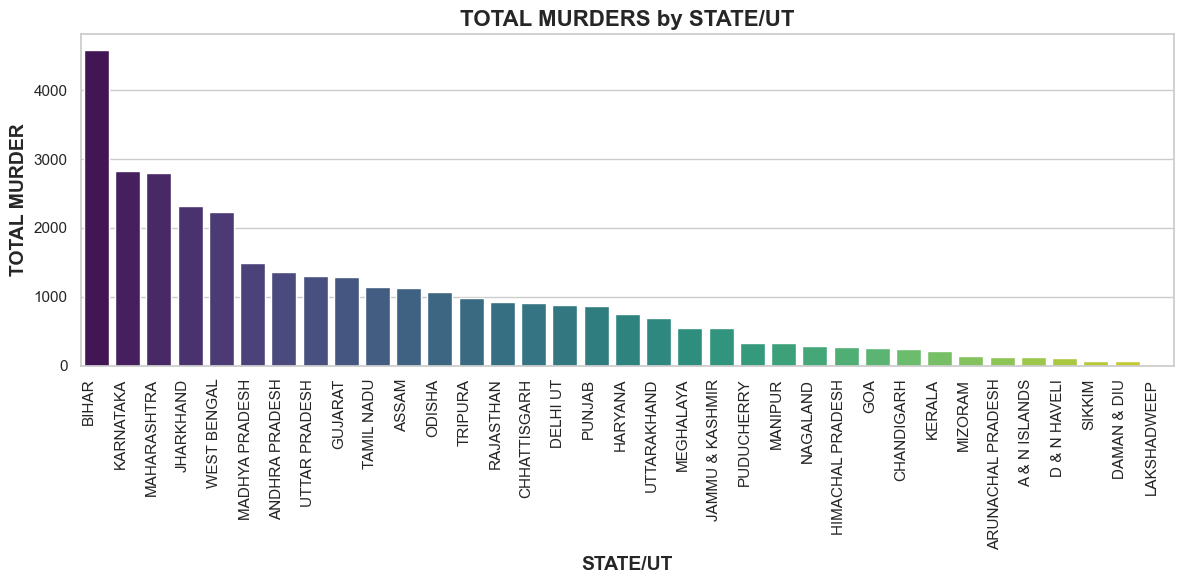

In [56]:
# Bar graph: Total Murders by State/UT

plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(x="STATE/UT", y="TOTAL MURDER", data=total_murders_by_state_ut, palette="viridis")

# Set the title and labels
plt.title('TOTAL MURDERS by STATE/UT', fontsize=16,fontweight='bold')
plt.xlabel('STATE/UT', fontsize=14,fontweight='bold')
plt.ylabel('TOTAL MURDER', fontsize=14,fontweight='bold')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

**Observesion:** 

**The bar graph displays the total number of murders in each of the Indian states and union territories. The state of Bihar has the highest murder rate (4586), while Lakshadweep has the lowest (3). Karnataka (2831) and Maharashtra (2796) have notable murder rates.**

In [60]:
# Analysis of total murders in each district
total_murders_by_district = sorted_df.groupby(by = 'DISTRICT').sum().reset_index().sort_values(by = 'TOTAL MURDER', ascending = False)
total_murders_by_district[['DISTRICT', 'TOTAL MURDER']]

,DISTRICT,TOTAL MURDER
42,PATNA,4586
6,BANGALORE COMMR.,2831
45,RANCHI,2322
36,MUMBAI COMMR.,1542
0,24 PARGANAS NORTH,1521
13,CYBERABAD,1360
37,MUZAFFARNAGAR,1307
35,MUMBAI,1254
11,CHENNAI,1137
52,WEST,984


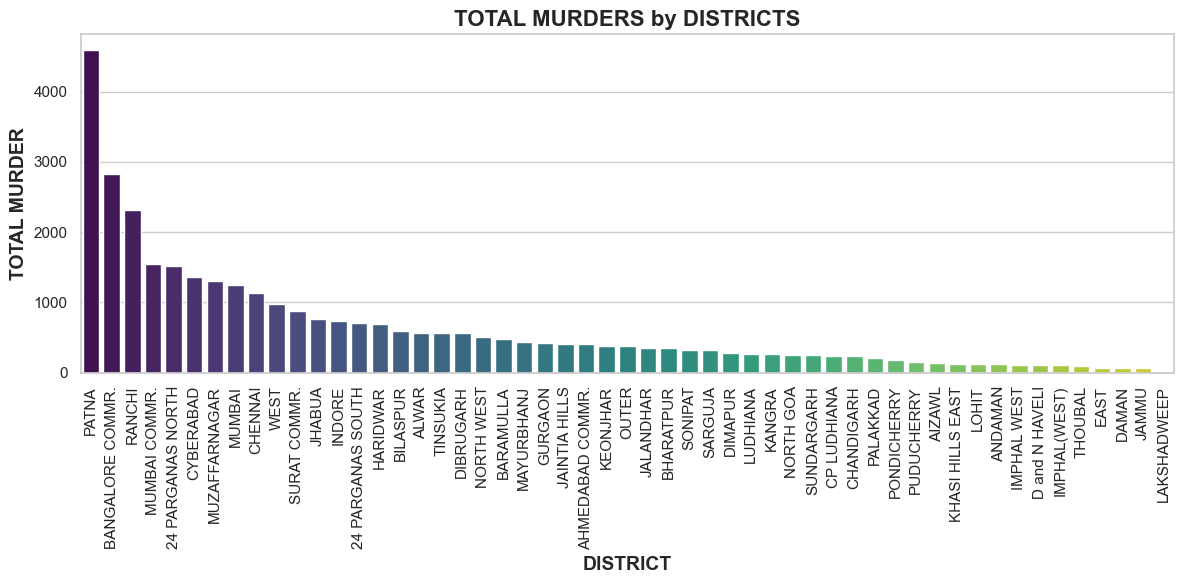

In [63]:
# Bar graph: Total Murders by Districts

plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(x="DISTRICT", y="TOTAL MURDER", data=total_murders_by_district, palette="viridis")

# Set the title and labels
plt.title('TOTAL MURDERS by DISTRICTS', fontsize=16,fontweight='bold')
plt.xlabel('DISTRICT', fontsize=14,fontweight='bold')
plt.ylabel('TOTAL MURDER', fontsize=14,fontweight='bold')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

**Observations:** 
    
**The distribution of overall murder counts among the various districts is depicted in the bar graph. Among the interesting findings are that Patna has the highest murder rate (4586), followed by Ranchi (2322) and Bangalore Commissionerate (2831). Substantial numbers are also present in districts like as Cyberabad, 24 Parganas North, and Mumbai Commissionerate. Lakshadweep has the lowest recorded murder rate (3). Jammu and Daman are two more districts with comparatively less numbers (64 and 64).**

In [64]:
# Analysis of total murders in each year
total_murders_by_year = sorted_df.groupby(by = 'YEAR').sum().reset_index().sort_values(by = 'TOTAL MURDER', ascending = False)
total_murders_by_year[['YEAR', 'TOTAL MURDER']]

,YEAR,TOTAL MURDER
1,2002,3295
0,2001,3245
3,2004,2996
6,2007,2970
7,2008,2811
5,2006,2699
10,2011,2663
2,2003,2634
11,2012,2524
8,2009,2514


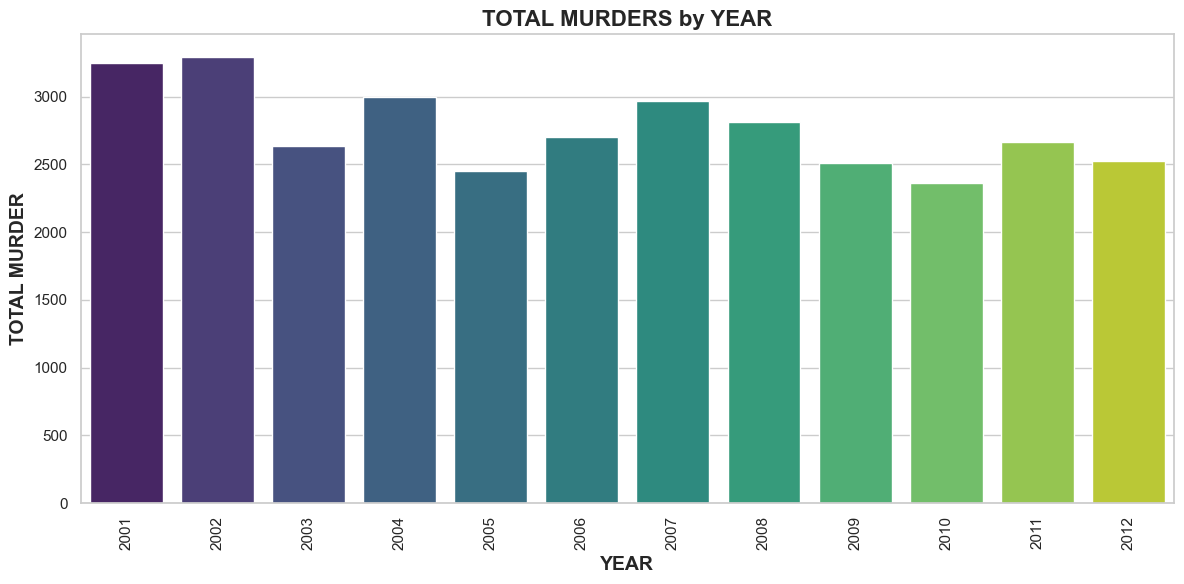

In [68]:
# Lineplot graph: Total Murders by Years

plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(x="YEAR", y="TOTAL MURDER", data=total_murders_by_year, palette="viridis")

# Set the title and labels
plt.title('TOTAL MURDERS by YEAR', fontsize=16,fontweight='bold')
plt.xlabel('YEAR', fontsize=14,fontweight='bold')
plt.ylabel('TOTAL MURDER', fontsize=14,fontweight='bold')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

**Observations:**

**The bar plot displays an outline with the total number of murders in different years. Important findings include the high year of 2002 (3295 murders), which was closely followed by 2001 (3245 murders). Notable counts are also shown for the following years, including 2004 (2996), 2007 (2970), and 2008 (2811). 2010 had the fewest documented murders overall (2364). All things considered, the data shows variations in the number of murders within the given time span, with larger numbers during the early 2000s.**

In [69]:
# Analysis of total murders in each state/UT by years
total_murders_by_year = sorted_df.groupby(by = ['STATE/UT', 'YEAR']).sum().reset_index().sort_values(by = 'TOTAL MURDER', ascending = False)
total_murders_by_year[['STATE/UT', 'YEAR', 'TOTAL MURDER']]

,STATE/UT,YEAR,TOTAL MURDER
39,BIHAR,2004,542
38,BIHAR,2003,484
37,BIHAR,2002,472
40,BIHAR,2005,436
36,BIHAR,2001,434
...,...,...,...
189,LAKSHADWEEP,2012,0
183,LAKSHADWEEP,2006,0
181,LAKSHADWEEP,2004,0
180,LAKSHADWEEP,2003,0


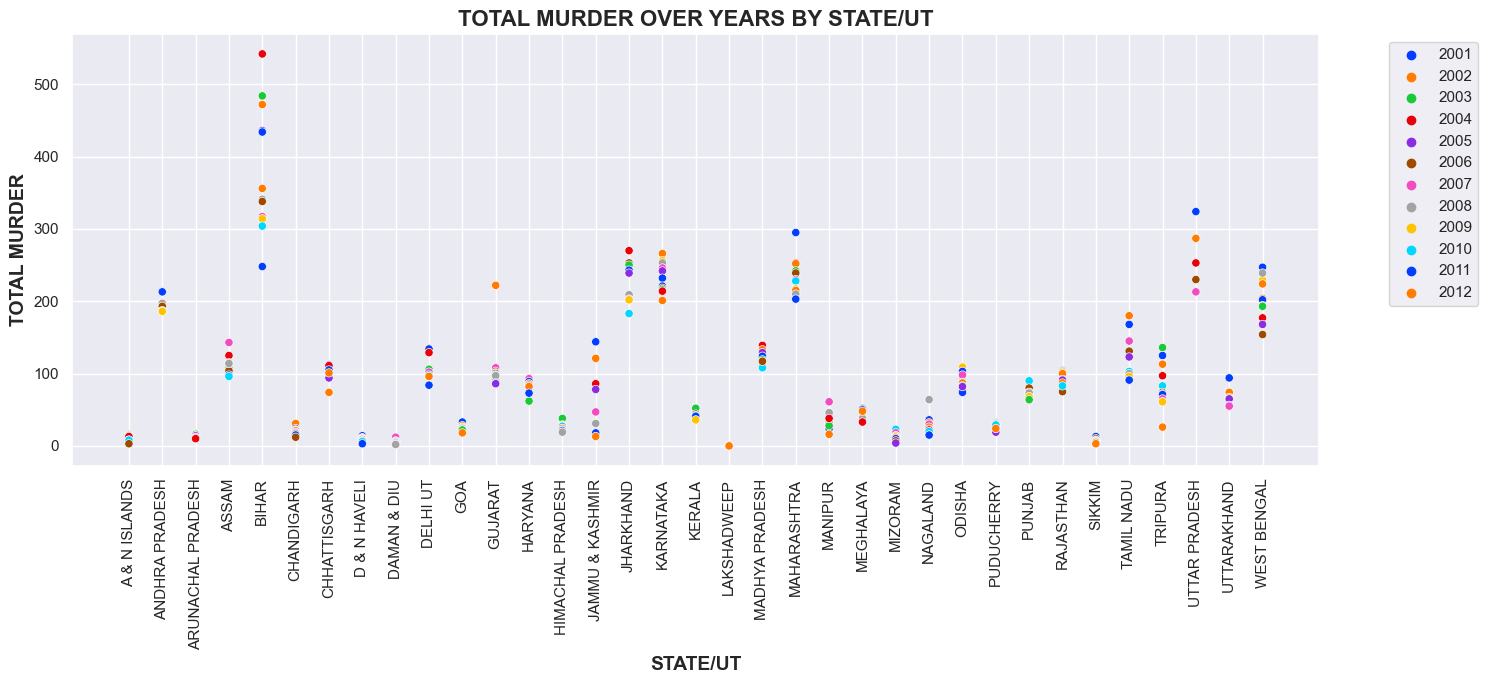

In [85]:
# Set the style of seaborn to darkgrid
sns.set(style="darkgrid")

# Set the size of the figure
plt.figure(figsize=(15, 7))

# Create a scatter plot with the "bright" color palette
sns.scatterplot(x=sorted_df['STATE/UT'], y=sorted_df['TOTAL MURDER'], hue=sorted_df['YEAR'], palette='bright', marker='o')

# Set the title and labels with bold fonts
plt.title('TOTAL MURDER OVER YEARS BY STATE/UT', fontsize=16, fontweight='bold')
plt.xlabel('STATE/UT', fontsize=14, fontweight='bold')
plt.ylabel('TOTAL MURDER', fontsize=14, fontweight='bold')

# Show the legend outside the plot for better visibility
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


**Observations:** 
    
**The scatterplot shows varying murder counts across Indian states and union territories. Bihar consistently records high counts, while states like Uttar Pradesh, Maharashtra, Jharkhand, Karnataka, and others show fluctuating trends. Some regions, like Lakshadweep, have minimal to zero counts. The summary offers insights into the dynamics of murder incidents over the specified years.**

In [80]:
# Analysis of total murders in each district by years
total_murders_by_year = sorted_df.groupby(by = ['DISTRICT', 'YEAR']).sum().reset_index().sort_values(by = 'TOTAL MURDER', ascending = False)
total_murders_by_year[['DISTRICT', 'YEAR', 'TOTAL MURDER']]

,DISTRICT,YEAR,TOTAL MURDER
288,PATNA,2004,542
287,PATNA,2003,484
286,PATNA,2002,472
289,PATNA,2005,436
285,PATNA,2001,434
...,...,...,...
223,LAKSHADWEEP,2009,0
221,LAKSHADWEEP,2007,0
220,LAKSHADWEEP,2006,0
218,LAKSHADWEEP,2004,0


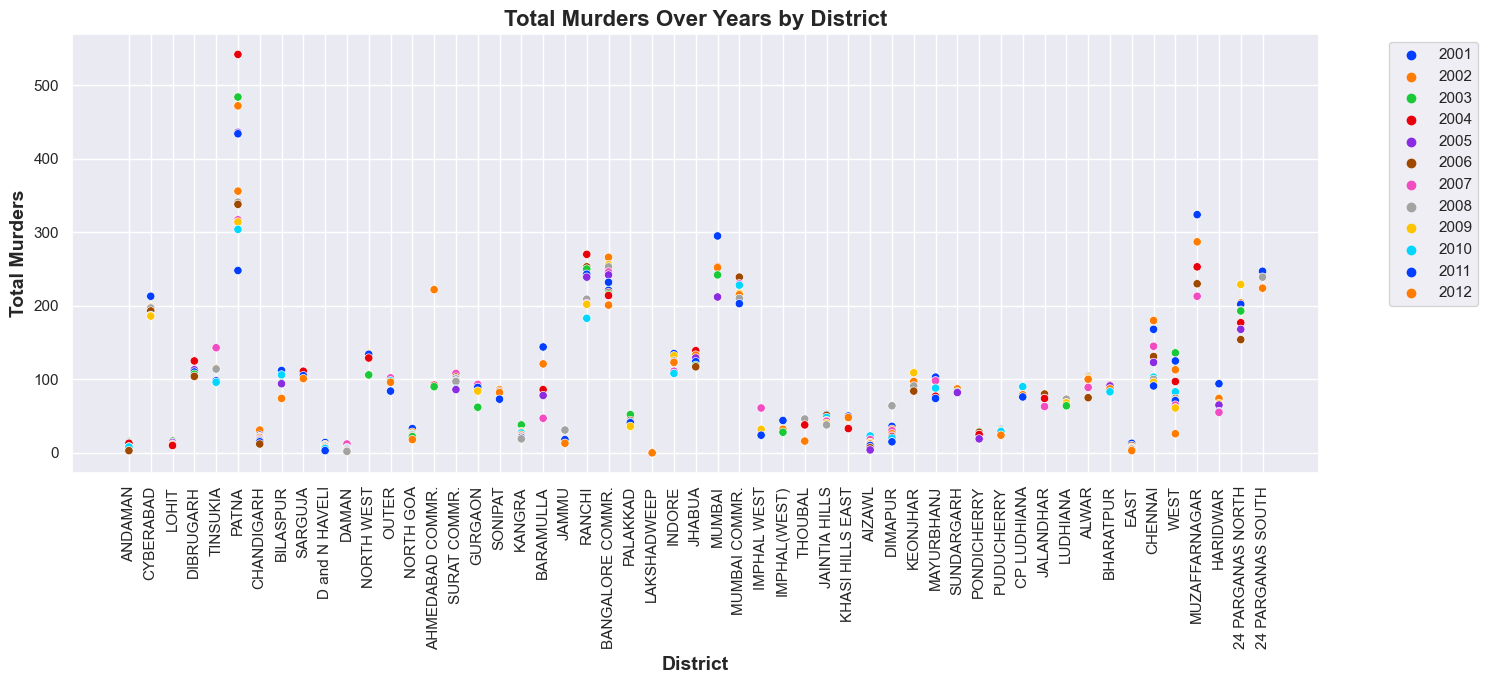

In [84]:
sns.set(style="darkgrid")

# Set the size of the figure
plt.figure(figsize=(15, 7))

# Create a scatter plot with the "bright" color palette
sns.scatterplot(x=sorted_df['DISTRICT'], y=sorted_df['TOTAL MURDER'], hue=sorted_df['YEAR'], palette='bright', marker='o')

# Set the title and labels with bold fonts
plt.title('Total Murders Over Years by District', fontsize=16, fontweight='bold')
plt.xlabel('District', fontsize=14, fontweight='bold')
plt.ylabel('Total Murders', fontsize=14, fontweight='bold')

# Show the legend outside the plot for better visibility
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

**Observations:** 
    
**The scatterplot displays the number of murders in different districts over a range of years. Patna has a history of high murder rates . Ranchi, Bangalore, Mumbai, and Muzaffarnagar are all heavily featured. However, there are areas with few or no homicides, such as Lakshadweep. The dataset shows notable differences in India's murder rates between districts and years.**

# END OF THE PHASE-3 